# Analysis of Location, Remote, and Experience

In [22]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%run utils.ipynb

## Load data

In [23]:
df = pd.read_csv('salary_vis2.csv', index_col=[0])

### Exam data integrity

In [24]:
df.columns

Index(['applicationsCount', 'applyType', 'applyUrl', 'benefits', 'companyId',
       'companyName', 'companyUrl', 'contractType', 'experienceLevel', 'id',
       'jobUrl', 'location', 'postedTime', 'posterFullName',
       'posterProfileUrl', 'publishedAt', 'salary', 'sector', 'title',
       'workType', 'min_years_of_experience', 'min_hourly_salary',
       'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary',
       'required_degree', 'remote_work', 'required_skills',
       'simplified_job_title', 'avg_hourly_salary', 'avg_yearly_salary'],
      dtype='object')

In [25]:
df = df[['companyName', 'applyUrl', 'experienceLevel', 'location', 'min_years_of_experience', 'required_degree', 'remote_work', 'avg_hourly_salary', 'avg_yearly_salary', 'simplified_job_title']].copy()
df.head()

,companyName,applyUrl,experienceLevel,location,min_years_of_experience,required_degree,remote_work,avg_hourly_salary,avg_yearly_salary,simplified_job_title
0,Coinbase,https://www.linkedin.com/jobs/view/data-analys...,Entry level,United States,3.0,NaN,NaN,NaN,142912.5,Data Analyst
1,The Walt Disney Company,https://www.disneycareers.com/job/-/-/391/7445...,Mid-Senior level,"New York, NY",3.0,BS,NaN,NaN,116900.0,Data Analyst
2,ParetoHealth,https://job-boards.greenhouse.io/paretocaptive...,Entry level,Greater Philadelphia,2.0,BS,True,NaN,NaN,Data Analyst
3,ThirdLove,https://www.thirdlove.com/pages/jobs?gh_jid=77...,Associate,San Francisco Bay Area,2.0,BS,NaN,NaN,115000.0,Data Analyst
6,McAfee,https://careers.mcafee.com/global/en/job/MCAFG...,Not Applicable,"San Jose, CA",3.0,NaN,True,NaN,107190.0,Data Analyst


In [26]:
df.shape

(766, 10)

## Job Location

### exam unique values and their count

In [27]:
df['location'].value_counts()

United States         92
New York, NY          61
San Francisco, CA     20
Atlanta, GA           19
Washington, DC        18
                      ..
Vancouver, WA          1
Fenton, MO             1
Hunt Valley, MD        1
Shaker Heights, OH     1
Skillman, NJ           1
Name: location, Length: 250, dtype: int64

When location is just Untied States, the job almost is always remote.
But when the loction is state name + United States, most are hybrid and on-site.
It's difficult and time consuming to adjust these entries so they are excluded from this analysis.

In [28]:
# check if the location is just United State, is it remote work
df[df['location']=='United States'].shape
# df[df['location']=='United States'].to_csv('location_us.csv')

(92, 10)

In [29]:
df[df['location']=='Texas, United States'].shape
# df[df['location']=='Texas, United States'].to_csv('location_us2.csv')

(3, 10)

In [30]:
df[df['location']=='California, United States'].shape
# df[df['location']=='California, United States'].to_csv('location_us3.csv')

(8, 10)

In [31]:
# group the locations and count the quantity
loc_df = df.groupby('location')['location'].size().reset_index(name='count')
loc_df = loc_df.sort_values(by='count', ascending=False)
loc_df.to_csv('sorted_location.csv')

There are some common variations, like Metropolitan Area can be removed. Use the funciton clean_location_names to convert location texts to standardized format

In [32]:
df['cleaned_location'] = clean_location_names(df)

In [33]:
df.to_csv('clean_location.csv')

Rank the top hiring locations

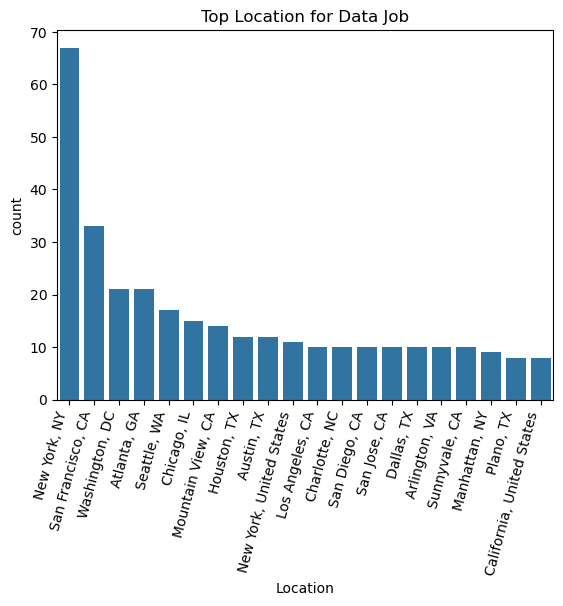

In [34]:
loc_df2 = df.groupby('cleaned_location')['cleaned_location'].size().reset_index(name='count')
loc_df2 = loc_df2.sort_values(by='count', ascending=False)
top_locations = loc_df2[1:21]
# loc_df2.to_csv('sorted_location2.csv')
sns.barplot(data=top_locations, x='cleaned_location', y='count')
plt.title('Top Location for Data Job')
plt.xlabel('Location', )
plt.xticks(rotation=75, ha='right')
plt.show()

New York City has the highest data job in the US, followed by SF, DC, Atlanta, Seattle and Chicago

In [35]:
df.loc[((df['location']=='United States') | (df['remote_work']==True)), 'remote_work'] = 'remote'
df.loc[((df['remote_work'].isna()) | (df['remote_work']==False)), 'remote_work'] = 'not remote'
df['remote_work']

0           remote
1       not remote
2           remote
3       not remote
6           remote
           ...    
1501    not remote
1503    not remote
1505        remote
1507        remote
1510        remote
Name: remote_work, Length: 766, dtype: object

### Remote Job Number and Ratio

In [36]:
remote_ratio = df.groupby('remote_work').size().reset_index(name='count')
remote_ratio

,remote_work,count
0,not remote,467
1,remote,299


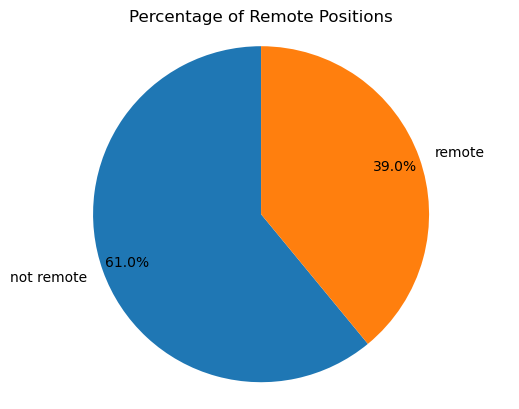

In [37]:
plt.pie(remote_ratio['count'], labels=remote_ratio['remote_work'], autopct='%1.1f%%', labeldistance=1.1, pctdistance=0.85, startangle=90)
plt.axis('equal')
plt.title('Percentage of Remote Positions')
plt.show()

### Distribution of Required Years of Experience

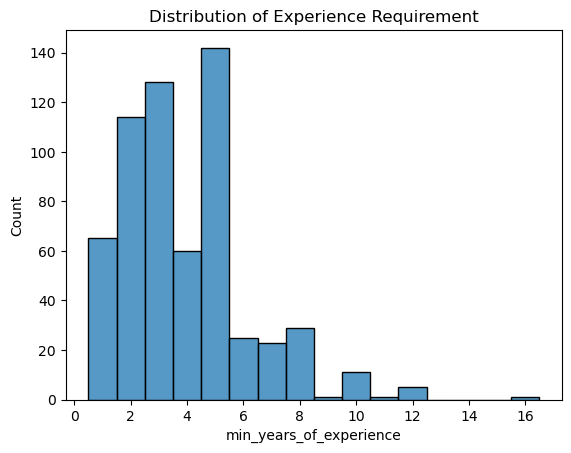

In [38]:
# df['min_years_of_experience']
sns.histplot(df['min_years_of_experience'], discrete=True)
plt.title('Distribution of Experience Requirement')
plt.show()

### Distribution of Required Experience Level

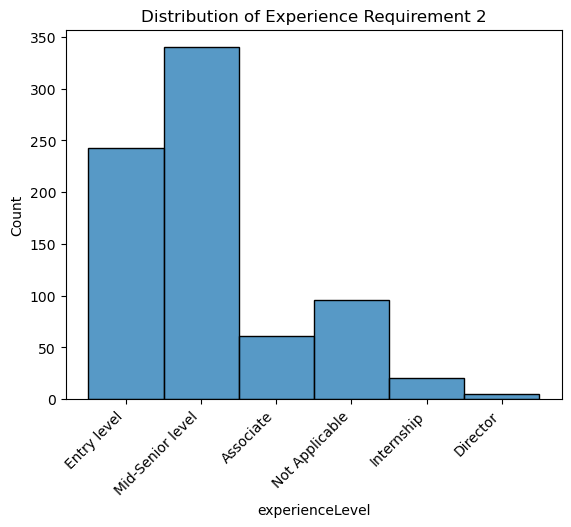

In [39]:
sns.histplot(df['experienceLevel'], discrete=True)
plt.title('Distribution of Experience Requirement 2')
plt.xticks(rotation=45, ha='right')
plt.show()